# Top 100 Tech Companies Stock Price Analysis
Hongyu Weng

Please install pandas, sqlite3, matplotlib module before running notebook.

In [1]:
import pandas as pd
import sqlite3
import csv
import os
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 15

## Data Preparation

In [2]:
c = sqlite3.connect("stocks.db")
c

In [3]:
pd.read_sql("select * from sqlite_master", c)

,type,name,tbl_name,rootpage,sql
0,table,SP500,SP500,5,"CREATE TABLE ""SP500"" ( Symbol TEXT, Name TEXT,..."
1,table,tech_list,tech_list,2,"CREATE TABLE tech_list ( Symbol TEXT, Name TEX..."


In [4]:
companies = pd.read_sql("select * from tech_list", c)
companies.head()

,Symbol,Name,Price,Change,%_Change,Volume,Avg_Vol,Market_Cap,PE_Ratio
0,AAPL,Apple Inc.,113.85,-3.49,-0.0297,127959000,150549000,1936.00,34.71
1,MSFT,Microsoft Corporation,210.11,-0.28,-0.0013,25684000,31868000,1589.00,33.89
2,TSM,Taiwan Semiconductor Manufacturing Company Lim...,98.13,2.80,0.0294,8610000,8620000,451.47,44.00
3,NVDA,NVIDIA Corporation,525.60,2.09,0.0040,9034000,12642000,325.35,85.92
4,CRM,salesforce.com inc.,257.64,-0.40,-0.0016,5382000,7842000,234.45,99.44


In [5]:
stock_list=list(companies["Symbol"])
stocks={}
for name in stock_list:
    path = os.path.join("Technology Companies", str(name)+".csv")
    stocks[name]=pd.read_csv(path)
    stocks[name]=stocks[name].set_index("Date")

In [6]:
stocks['AAPL']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.284267
2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.290990
2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.272961
2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.331634
2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.323994
...,...,...,...,...,...,...
2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,120.300003
2020-11-17,120.669998,118.959999,119.550003,119.389999,74271000.0,119.389999
2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,118.029999


In [7]:
tech_stocks=pd.concat(stocks.values(), axis=1, keys=stock_list)
tech_stocks.index = pd.to_datetime(tech_stocks.index)
tech_stocks.columns.names = ['Symbol','Stock Info']
tech_stocks.head()

Symbol          AAPL                                                       \
Stock Info      High       Low      Open     Close       Volume Adj Close   
2006-01-03  2.669643  2.580357  2.585000  2.669643  807234400.0  2.284267   
2006-01-04  2.713571  2.660714  2.683214  2.677500  619603600.0  2.290990   
2006-01-05  2.675000  2.633929  2.672500  2.656429  449422400.0  2.272961   
2006-01-06  2.739286  2.662500  2.687500  2.725000  704457600.0  2.331634   
2006-01-09  2.757143  2.705000  2.740357  2.716071  675040800.0  2.323994   

Symbol           MSFT                               ... AVLR               \
Stock Info       High    Low       Open      Close  ... Open Close Volume   
2006-01-03  27.000000  26.10  26.250000  26.840000  ...  NaN   NaN    NaN   
2006-01-04  27.080000  26.77  26.770000  26.969999  ...  NaN   NaN    NaN   
2006-01-05  27.129999  26.91  26.959999  26.990000  ...  NaN   NaN    NaN   
2006-01-06  27.000000  26.49  26.889999  26.910000  ...  NaN   NaN    NaN   
2006-01-09  27.070000  26.76  26.930000  26.860001  ...  NaN   NaN    NaN   

Symbol                      STX                                           \
Stock Info Adj Close       High        Low   Open      Close      Volume   
2006-01-03       NaN  20.129999  19.690001  20.10  20.070000   8194000.0   
2006-01-04       NaN  21.120001  20.200001  20.24  21.040001  12653000.0   
2006-01-05       NaN  21.120001  20.850000  21.01  20.850000   9026600.0   
2006-01-06       NaN  21.450001  20.879999  21.08  21.389999   9870500.0   
2006-01-09       NaN  22.350000  21.450001  21.52  22.290001   9621700.0   

Symbol                 
Stock Info  Adj Close  
2006-01-03  11.385056  
2006-01-04  11.935305  
2006-01-05  11.827526  
2006-01-06  12.133849  
2006-01-09  12.644396  

[5 rows x 600 columns]

## Data Exploration and Analysis
## 1. In our dataset, how many companies are in each S&P500 sector?

In [8]:
companies_per_sector=pd.read_sql("select Sector, COUNT(*) as count from SP500 Group by Sector order by count desc", c)
companies_per_sector

,Sector,count
0,Industrials,73
1,Information Technology,71
2,Financials,66
3,Health Care,62
4,Consumer Discretionary,61
5,Consumer Staples,33
6,Real Estate,31
7,Utilities,28
8,Materials,28
9,Energy,26


## 2. How many companies are in each sector? (answer with a plot)

Text(0.5, 0, 'Number of companies')

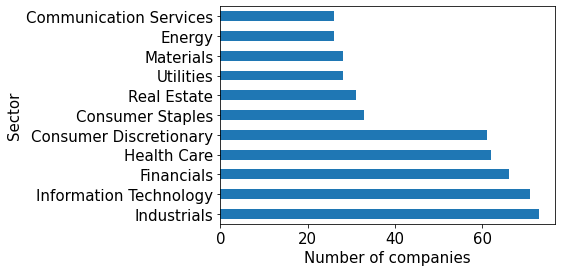

In [9]:
ax=companies_per_sector.set_index("Sector").plot.barh()
ax.get_legend().remove()
ax.set_xlabel("Number of companies")

## 3. What are the top five companies that have the highest current stock price?

In [10]:
pd.read_sql("select * from tech_list order by length(Price) desc, Price desc limit 5", c)

,Symbol,Name,Price,Change,%_Change,Volume,Avg_Vol,Market_Cap,PE_Ratio
0,FTV-PA,Fortive Corporation,1020.00,3.14,0.0031,483,6552,27.00,667.10
1,SHOP,Shopify Inc.,980.01,-8.50,-0.0086,1066000,1780000,119.55,605.32
2,NVDA,NVIDIA Corporation,525.60,2.09,0.0040,9034000,12642000,325.35,85.92
3,NOW,ServiceNow Inc.,522.11,4.05,0.0078,1293000,1368000,101.86,150.29
4,ADBE,Adobe Inc.,460.61,-2.31,-0.0050,2371000,3047000,220.96,58.01


In [11]:
print(companies.dtypes)

Symbol        object
Name          object
Price         object
Change        object
%_Change      object
Volume        object
Avg_Vol       object
Market_Cap    object
PE_Ratio      object
dtype: object


### That's why we have to order by length first. We need float instead of object type. Let's change it!

In [12]:
tech_companies=pd.DataFrame()
for item in companies.columns.tolist():
    if item not in ["Symbol","Name"]:
        tech_companies[item]=companies[item].astype(float)
    else:
        tech_companies[item]=companies[item]
print(tech_companies.dtypes)

Symbol         object
Name           object
Price         float64
Change        float64
%_Change      float64
Volume        float64
Avg_Vol       float64
Market_Cap    float64
PE_Ratio      float64
dtype: object


## 4. What are the top five companies that have the largest market capitalization? (answer with a plot)

Text(0, 0.5, '')

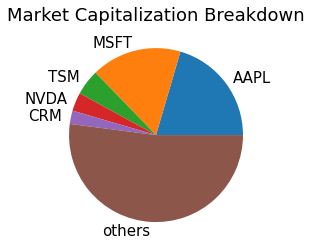

In [13]:
top5=tech_companies.sort_values("Market_Cap", ascending=False)[["Symbol","Market_Cap"]][:5]
others=tech_companies.sort_values("Market_Cap", ascending=False)[5:]
top5.loc[5]=["others",others["Market_Cap"].sum()]

ax=top5.set_index('Symbol').plot.pie(y='Market_Cap', legend=False, title="Market Capitalization Breakdown")
ax.set_ylabel('')

## 5. What are the top ten companies that have the highest PE ratio?

In [14]:
tech_companies.sort_values("PE_Ratio", ascending=False).head(10)

,Symbol,Name,Price,Change,%_Change,Volume,Avg_Vol,Market_Cap,PE_Ratio
59,FTV-PA,Fortive Corporation,1020.00,3.14,0.0031,483.0,6552.0,27.00,667.10
15,SHOP,Shopify Inc.,980.01,-8.50,-0.0086,1066000.0,1780000.0,119.55,605.32
68,STNE,StoneCo Ltd.,72.67,2.92,0.0419,2905000.0,2238000.0,22.40,386.54
20,SQ,Square Inc.,207.91,11.94,0.0609,12216000.0,9772000.0,93.75,315.49
31,ADSK,Autodesk Inc.,257.25,2.36,0.0093,1208000.0,1486000.0,56.41,157.92
19,NOW,ServiceNow Inc.,522.11,4.05,0.0078,1293000.0,1368000.0,101.86,150.29
57,GLW,Corning Incorporated,36.63,0.33,0.0091,1897000.0,4388000.0,27.99,143.65
64,PAYC,Paycom Software Inc.,402.49,9.78,0.0249,256261.0,434015.0,23.20,142.88
46,STM,STMicroelectronics N.V.,37.51,0.97,0.0265,2170000.0,2372000.0,33.55,126.72
18,AMD,Advanced Micro Devices Inc.,85.31,0.67,0.0079,46505000.0,51987000.0,102.60,115.60


## Now, let's focus on the stock information.
## 6. Which company has the highest average volume for 2020?

In [15]:
tech_stocks.xs('Volume', axis=1, level='Stock Info').loc["2020-01-01":].mean().sort_values(ascending=False).head(1)

Symbol
AAPL    1.561944e+08
dtype: float64

## 7. What are the top five companies that have the highest average volume for 2020? (answer with a plot)

Text(0, 0.5, 'Average Volume (Million)')

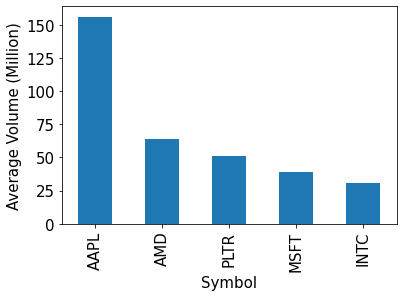

In [16]:
volume_top5=tech_stocks.xs('Volume', axis=1, level='Stock Info').loc["2020-01-01":].mean().sort_values(ascending=False).head()
volume_top5=volume_top5/1e6
ax=volume_top5.plot.bar()
ax.set_ylabel("Average Volume (Million)")

## 8. What is the correlation between the open price and adjusted close price of Apple stock? (answer with a plot)

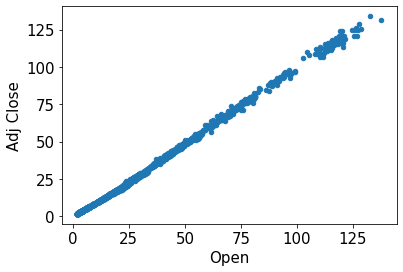

In [17]:
tech_stocks["AAPL"].plot.scatter(x = "Open", y = "Adj Close")

## 9. How do stock prices of the top five companies in Question 4 change in the latest three years? (answer with a plot)

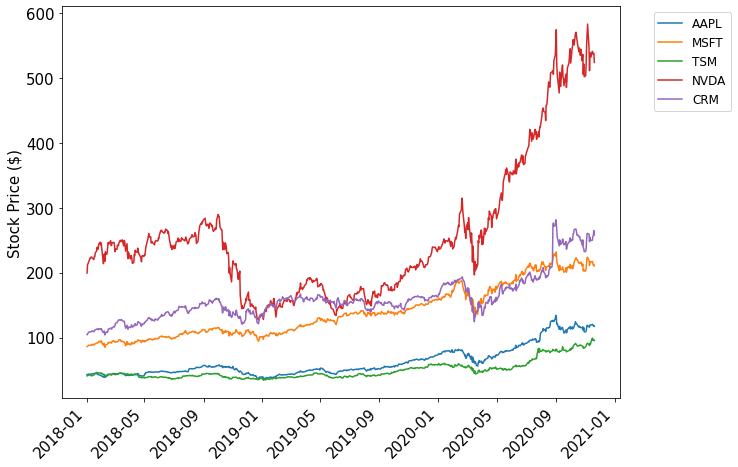

In [18]:
ax=tech_stocks.xs("Close", axis=1, level="Stock Info")[list(top5["Symbol"][:5])].loc["2018-01-01":].plot.line(figsize=(10, 8))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel("Stock Price ($)")
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))

### We find that stock prices of all the companies fell in March 2020 to varying degrees because of the virus breakout. But the stock prices of these companies especially Apple keep increase in the following months. 
### Now, let's see the profitability of companies. We need to calculate returns for each stock. 

In [19]:
# First, we calculate the daily return for each stock.
daily_returns= pd.DataFrame()
for name in stock_list:
    daily_returns[name] = tech_stocks[name]["Adj Close"].pct_change()
daily_returns = daily_returns[1:]
daily_returns.head()

,AAPL,MSFT,TSM,NVDA,CRM,ADBE,INTC,ASML,CSCO,ORCL,...,CHKP,AKAM,TYL,CCC,UI,ZEN,CTXS,TRMB,AVLR,STX
2006-01-04,0.002943,0.004844,0.007921,0.027996,0.050526,-0.002596,0.013296,0.016137,0.022922,0.001588,...,0.042116,0.025000,0.012346,NaN,NaN,NaN,0.023940,0.001664,NaN,0.048331
2006-01-05,-0.007869,0.000741,0.016700,0.022652,0.002502,-0.009110,0.013894,0.022137,0.028012,0.013471,...,-0.010808,0.013133,0.006652,NaN,NaN,NaN,0.000668,-0.003599,NaN,-0.009030
2006-01-06,0.025813,-0.002964,0.043478,0.016426,0.105103,0.024429,0.001523,0.033428,0.022888,0.025801,...,0.050831,0.040278,0.005507,NaN,NaN,NaN,0.005674,0.008058,NaN,0.025899
2006-01-09,-0.003277,-0.001858,0.012037,0.027914,-0.033124,-0.015897,0.006081,0.025057,0.015451,-0.018293,...,-0.012206,-0.015131,0.007667,NaN,NaN,NaN,-0.006970,0.011301,NaN,0.042076
2006-01-10,0.063248,0.005212,-0.029277,0.000238,-0.007267,0.005993,-0.013222,-0.011111,-0.004722,-0.020186,...,-0.011442,0.039765,-0.017391,NaN,NaN,NaN,-0.014372,0.028346,NaN,0.046209


## 10. What are the top five riskiest stocks over the entire time period?
### The higher standard deviation of returns, the riskier the stock is. We need to find which stock has the highest standard deviation of returns. 

In [20]:
daily_returns.std().sort_values(ascending=False).head()

U       0.063053
PLTR    0.058693
STNE    0.048604
SNOW    0.047010
ZI      0.045996
dtype: float64

## 11. How does Apple stock daily return change over the entire time period? (answer with a plot)

Text(0, 0.5, 'Daily Return')

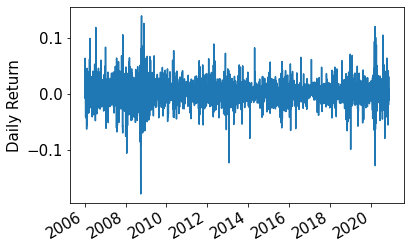

In [21]:
ax=daily_returns["AAPL"].plot.line(legend=False)
ax.set_ylabel("Daily Return")

### We can see that most of the time, Apple stock daily return is between -0.10 and 0.10. The largest fluctuation occurred in 2008 because of the financial crisis. The second largest fluctuation occured in 2020 because of the Covid19.
## 12. What are the differences between the distributions of Apple stock daily returns in 2019 and 2020? (answer with a plot)

Text(0.5, 0, 'Daily Returns')

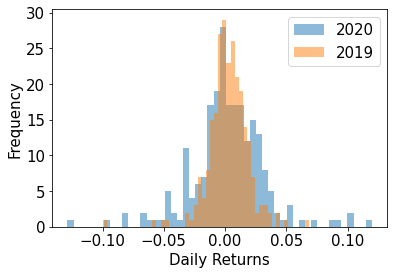

In [22]:
apple20=daily_returns["AAPL"].loc["2020-01-01":]
apple19=daily_returns["AAPL"].loc["2019-01-01":"2019-12-31"]
plt.hist(apple20, bins=50, alpha=0.5, label='2020')
plt.hist(apple19, bins=50, alpha=0.5, label='2019')
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Daily Returns")

### We find that Covid19 makes the distribution of daily stock returns more diversified, which increases the riskiness of investments.

In [23]:
cum_returns = pd.DataFrame()
for name in stock_list:
    cum_returns[name] = (daily_returns[name]+1).cumprod()-1
cum_returns.head()

,AAPL,MSFT,TSM,NVDA,CRM,ADBE,INTC,ASML,CSCO,ORCL,...,CHKP,AKAM,TYL,CCC,UI,ZEN,CTXS,TRMB,AVLR,STX
2006-01-04,0.002943,0.004844,0.007921,0.027996,0.050526,-0.002596,0.013296,0.016137,0.022922,0.001588,...,0.042116,0.025000,0.012346,NaN,NaN,NaN,0.023940,0.001664,NaN,0.048331
2006-01-05,-0.004949,0.005589,0.024753,0.051282,0.053154,-0.011682,0.027375,0.038631,0.051576,0.015080,...,0.030852,0.038462,0.019080,NaN,NaN,NaN,0.024624,-0.001941,NaN,0.038864
2006-01-06,0.020736,0.002609,0.069307,0.068551,0.163843,0.012461,0.028940,0.073350,0.075645,0.041270,...,0.083252,0.080288,0.024691,NaN,NaN,NaN,0.030438,0.006101,NaN,0.065770
2006-01-09,0.017392,0.000745,0.082178,0.098378,0.125292,-0.003634,0.035197,0.100245,0.092264,0.022222,...,0.070029,0.063942,0.032548,NaN,NaN,NaN,0.023256,0.017471,NaN,0.110613
2006-01-10,0.081740,0.005961,0.050495,0.098639,0.117114,0.002336,0.021509,0.088020,0.087106,0.001588,...,0.057786,0.106250,0.014590,NaN,NaN,NaN,0.008550,0.046312,NaN,0.161933


## 13. Assuming you initally invested 1 dollar in Apple Stock in 2006, what is your cumulative returns in every future year? (answer with a plot)

Text(0, 0.5, 'Growth of $1 investment')

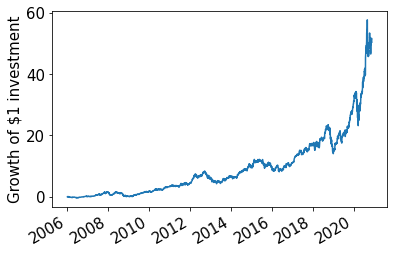

In [24]:
ax=cum_returns["AAPL"].plot.line()
ax.set_ylabel("Growth of $1 investment")

### You could have made over 50 dollars on a 1 dollar investment since 2006. That is quite a remarkable performance!

## 14. Assuming you initally invested 1 dollar in Microsoft Stock in 2006, what is your cumulative returns in every future year? (answer with a plot)

Text(0, 0.5, 'Growth of $1 investment')

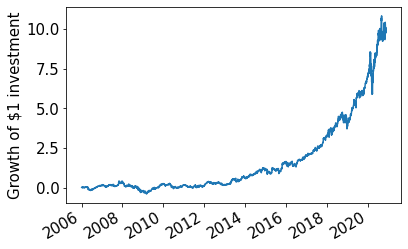

In [25]:
ax=cum_returns["MSFT"].plot.line()
ax.set_ylabel("Growth of $1 investment")

### Well, you could have made about 10 dollars on a 1 dollar investment since 2006. This is much less than cumulative returns of Apple stock. But we can see the cumulative returns line of Microsoft is smoother than the cumulative returns line of Apple. This shows that the risk of investing in Microsoft stock is lower.
## 15. How many times more risky is investing in Apple stock than investing in Microsoft stock?

In [26]:
risk_apple=daily_returns["AAPL"].std()
risk_microsoft=daily_returns["MSFT"].std()
risk_apple/risk_microsoft

1.174013437127571

### Investing in Apple stock is 1.17 times more risky than investing in Microsoft stock. High returns come with high risk！

## 16. In the Top 100 Tech Companies, which are the most profitable companies over the entire time period?

In [27]:
cum_returns.iloc[-1].sort_values(ascending=False).head()

SHOP    57.147648
AAPL    50.368776
TYL     45.517397
NVDA    43.680370
CRM     29.144859
Name: 2020-11-20 00:00:00, dtype: float64

In [28]:
# Second, we calculate the yearly return for each stock.
yearly_returns= pd.DataFrame()
for name in stock_list:
    yearly_returns[name] = tech_stocks[name]["Adj Close"].resample('Y').ffill().pct_change()
yearly_returns = yearly_returns[1:]
yearly_returns.head()

,AAPL,MSFT,TSM,NVDA,CRM,ADBE,INTC,ASML,CSCO,ORCL,...,CHKP,AKAM,TYL,CCC,UI,ZEN,CTXS,TRMB,AVLR,STX
2007-12-31,1.334748,0.208429,-0.049057,0.378817,0.719890,0.039154,0.342319,0.223219,-0.009513,0.317386,...,0.001825,-0.348645,-0.083215,NaN,NaN,NaN,0.405176,0.192194,NaN,-0.021977
2008-12-31,-0.569113,-0.443856,-0.164318,-0.762787,-0.489392,-0.501755,-0.435123,-0.414211,-0.397857,-0.214792,...,-0.135246,-0.563873,-0.070597,NaN,NaN,NaN,-0.379900,-0.285384,NaN,-0.820046
2009-12-31,1.469010,0.604672,0.526093,1.314747,1.304592,0.727571,0.439030,0.916219,0.468712,0.393870,...,0.784097,0.679258,0.661937,NaN,NaN,NaN,0.765379,0.166127,NaN,3.138511
2010-12-31,0.530679,-0.065246,0.150723,-0.175589,0.789345,-0.163132,0.062695,0.133804,-0.154971,0.286125,...,0.365407,0.856748,0.042692,NaN,NaN,NaN,0.644076,0.584524,NaN,-0.173722
2011-12-31,0.255580,-0.045157,0.072942,-0.100000,-0.231364,-0.081546,0.193964,0.104508,-0.096172,-0.174621,...,0.135754,-0.313921,0.450385,NaN,NaN,NaN,-0.112410,0.086902,NaN,0.130030


## 17. In the Top 100 Tech Companies, which are the most profitable companies for the year 2020?

In [29]:
most_profitable=yearly_returns.iloc[-1].sort_values(ascending=False).head()
most_profitable

NET     2.900938
SQ      2.132513
ZS      2.075484
DOCU    1.990015
CRWD    1.921997
Name: 2020-12-31 00:00:00, dtype: float64

## 18. How do the stock prices of companies in Q17 change in the latest three years? (answer with a plot)

Text(0, 0.5, 'Stock Price ($)')

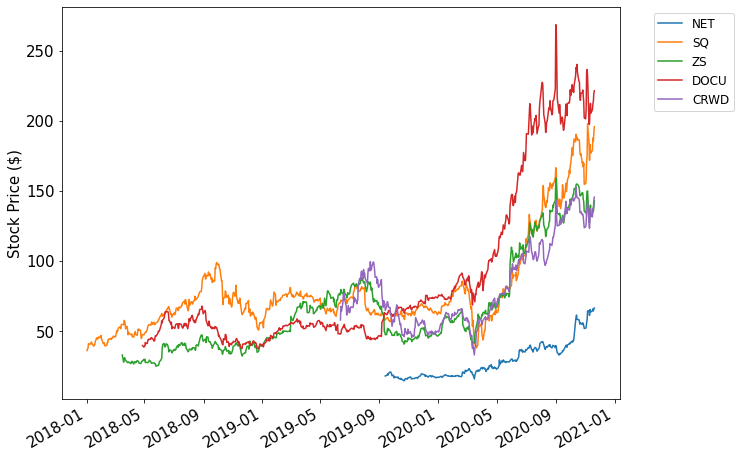

In [30]:
prices=tech_stocks.xs('Close', axis=1, level='Stock Info')[list(most_profitable.index)].loc["2018-01-01":]
ax=prices.plot.line(figsize=(10, 8))
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_ylabel("Stock Price ($)")

### Overall, the stock price of these companies rises significantly after falling in March.

## 19. How many companies having negative yearly return for the year 2020?

In [31]:
negative_yearly_return=yearly_returns.iloc[-1][yearly_returns.iloc[-1]<0]
negative_yearly_return.count()

11

### We want to know if Covid19 has significant impact on companies in Q19.
## 20. How do the stock prices of companies in Q19 change in the latest three years? (answer with a plot)

Text(0, 0.5, 'Stock Price ($)')

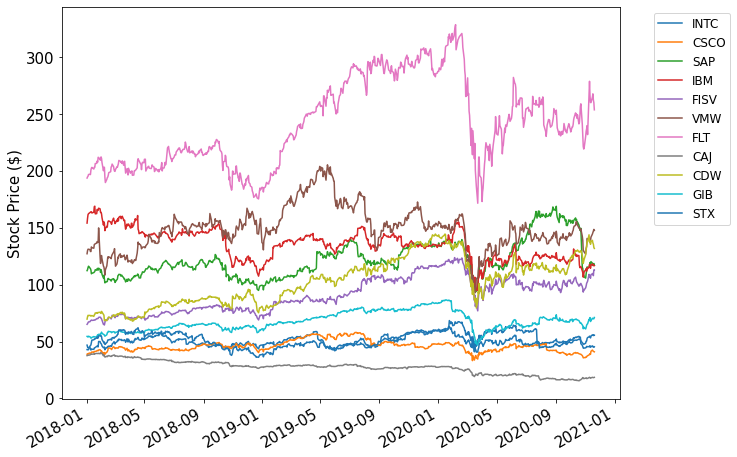

In [32]:
prices=tech_stocks.xs('Close', axis=1, level='Stock Info')[list(negative_yearly_return.index)].loc["2018-01-01":]
ax=prices.plot.line(figsize=(10, 8))
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_ylabel("Stock Price ($)")

### We can see that in the past three years, stock prices of most companies keep fluctuating. There is no clear upward trend for them. We can't regard Covid19 as the most important factor that affects their stock price in 2020.